In [1]:
import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages harsha2010:magellan:1.0.4-s_2.11 pyspark-shell'

os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages harsha2010:magellan:1.0.1-s_2.10 pyspark-shell'

In [2]:
spark = SparkSession.builder.appName("pyspark-shapefiles").getOrCreate()

In [3]:
sc = spark.sparkContext

In [4]:
from magellan.types import Point, Polygon
from pyspark.sql import Row
from pyspark.sql.functions import *

# Dataset

In [5]:
df = spark.read.format("magellan").load('/Users/abanihi/Documents/shapefiles/mrb/').cache()

In [6]:
df.show()

+-----+--------+--------------------+----------------+-----+
|point|polyline|             polygon|        metadata|valid|
+-----+--------+--------------------+----------------+-----+
| null|    null|magellan.Polygon@...|Map(mrb ->    1)| true|
+-----+--------+--------------------+----------------+-----+



In [7]:
df.printSchema()

root
 |-- point: point (nullable = true)
 |-- polyline: polyline (nullable = true)
 |-- polygon: polygon (nullable = true)
 |-- metadata: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- valid: boolean (nullable = true)



In [8]:
states_df = df.select(df['metadata']['mrb'], df['polygon'])
states_df.show()

+-------------+--------------------+
|metadata[mrb]|             polygon|
+-------------+--------------------+
|            1|magellan.Polygon@...|
+-------------+--------------------+



In [9]:
states_df.createOrReplaceTempView("states")

In [10]:
spark.sql("""
     SELECT *
     FROM states
""").show()

+-------------+--------------------+
|metadata[mrb]|             polygon|
+-------------+--------------------+
|            1|magellan.Polygon@...|
+-------------+--------------------+



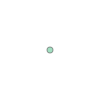

In [11]:
a = Point(40.0, 100.0).toShapely()
a

In [18]:
c = Polygon([43, 35])

In [21]:
square = [
  Point(1.0, 1.0),
  Point(1.0, -1.0),
  Point(-1.0, -1.0),
  Point(-1.0, 1.0),
  Point(1.0, 1.0)
]


In [25]:
c =  [0, Polygon([0], square)]

In [31]:
d = c[1].toShapely()

In [ ]:
b = states_df.select(d.contains(states_df['polygon']))

In [11]:
PointRecord = Row("id", "point")
points = sc.parallelize([
  (0, Point(-30.0, -100.0)),
  (1, Point(31.0, 100)),
  (2, Point(1.0, -1.0))])\
.map(lambda x: PointRecord(*x))\
.toDF()

points.show()

+---+--------------------+
| id|               point|
+---+--------------------+
|  0|Point(-30.0, -100.0)|
|  1|    Point(31.0, 0.0)|
|  2|    Point(1.0, -1.0)|
+---+--------------------+



In [12]:
a = Point(40.0, 100.0)
a

Point (40.0,100.0)

In [13]:
a = a.toShapely()

In [18]:
a.

0.0

In [23]:
b = df.select(df['polygon'])

In [26]:
b.

AttributeError: 'Point' object has no attribute '_jdf'

# Uber Dataset

In [5]:
uber_df = spark.read.format("csv")\
                    .option("delimiter", "\t")\
                    .option("header", "false")\
                    .option("nullValue", "?")\
                    .option("inferSchema", "true")\
                    .load("/Users/abanihi/Documents/shapefiles/uber/all.tsv").repartition(20).cache()

In [7]:
uber = sc.textFile("/Users/abanihi/Documents/shapefiles/uber/all.tsv")\
         .map(lambda x: x.split("\t"))\
         .map(lambda x: Row(tripId = str(x[0]), timestamp = ))

In [8]:
uber.first()

[u'00001', u'2007-01-07T10:54:50+00:00', u'37.782551', u'-122.445368']

In [6]:
uber_df.show()

+---+--------------------+---------+-----------+
|_c0|                 _c1|      _c2|        _c3|
+---+--------------------+---------+-----------+
|  1|2007-01-07 03:56:...|37.784965|-122.439938|
|  2|2007-01-05 23:23:...|37.800702|-122.436298|
|  3|2007-01-01 23:01:...|37.787169|-122.417145|
|  4|2007-01-06 01:45:...|37.787282|-122.394426|
|  5|2007-01-01 20:54:...|37.776842|-122.438442|
|  5|2007-01-01 20:56:...|37.778847|-122.438706|
|  6|2007-01-03 18:04:...| 37.79932|-122.429251|
|  6|2007-01-03 18:07:...|37.802693|-122.429179|
|  7|2007-01-07 09:10:...|37.762278|-122.415127|
|  8|2007-01-02 17:54:...|37.771248|-122.424327|
|  8|2007-01-02 17:56:...| 37.76658|-122.430211|
|  8|2007-01-02 17:59:...|37.759913|-122.444698|
|  8|2007-01-02 18:01:...|37.750448|-122.444013|
|  9|2007-01-06 22:08:...|37.788483|-122.395963|
|  9|2007-01-06 22:10:...|37.785114|-122.394365|
| 10|2007-01-04 14:02:...|37.784577|-122.399948|
| 11|2007-01-06 02:08:...|37.801069|-122.422785|
| 13|2007-01-04 03:0

In [9]:
uber_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)



In [ ]:
df = df.withColumn('joined_column', 
                    sf.concat(sf.col('colname1'),sf.lit('_'), sf.col('colname2')))
df.show()


In [20]:
a = uber_df.withColumn('Joined', concat(col('_c2'), lit(','), col('_c3')).cast(Point()))

Py4JJavaError: An error occurred while calling o24.parseDataType.
: java.lang.ClassNotFoundException: magellan.PointUDT
	at java.net.URLClassLoader.findClass(URLClassLoader.java:381)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:424)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:357)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:348)
	at org.apache.spark.util.Utils$.classForName(Utils.scala:229)
	at org.apache.spark.sql.types.DataType$.parseDataType(DataType.scala:158)
	at org.apache.spark.sql.types.DataType$.fromJson(DataType.scala:104)
	at org.apache.spark.sql.SparkSession.parseDataType(SparkSession.scala:681)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [17]:
a.show()

+---+--------------------+---------+-----------+--------------------+
|_c0|                 _c1|      _c2|        _c3|              Joined|
+---+--------------------+---------+-----------+--------------------+
|  1|2007-01-07 03:56:...|37.784965|-122.439938|37.784965,-122.43...|
|  2|2007-01-05 23:23:...|37.800702|-122.436298|37.800702,-122.43...|
|  3|2007-01-01 23:01:...|37.787169|-122.417145|37.787169,-122.41...|
|  4|2007-01-06 01:45:...|37.787282|-122.394426|37.787282,-122.39...|
|  5|2007-01-01 20:54:...|37.776842|-122.438442|37.776842,-122.43...|
|  5|2007-01-01 20:56:...|37.778847|-122.438706|37.778847,-122.43...|
|  6|2007-01-03 18:04:...| 37.79932|-122.429251|37.79932,-122.429251|
|  6|2007-01-03 18:07:...|37.802693|-122.429179|37.802693,-122.42...|
|  7|2007-01-07 09:10:...|37.762278|-122.415127|37.762278,-122.41...|
|  8|2007-01-02 17:54:...|37.771248|-122.424327|37.771248,-122.42...|
|  8|2007-01-02 17:56:...| 37.76658|-122.430211|37.76658,-122.430211|
|  8|2007-01-02 17:5

In [ ]:
df = df.selectExpr("_c0 as tripId", "_c1 as timestamp", "_c2 as ")

In [40]:
df = spark.read.format("magellan").load('/Users/abanihi/Documents/shapefiles/planning_neighborhoods/').cache()

In [41]:
df.show()

+-----+--------+--------------------+--------------------+-----+
|point|polyline|             polygon|            metadata|valid|
+-----+--------+--------------------+--------------------+-----+
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.Polygon@...|Map(neighborho ->...| true|
| null|    null|magellan.

In [43]:
df.select(explode(df['metadata']).alias("k", "v")).show()

+----------+--------------------+
|         k|                   v|
+----------+--------------------+
|neighborho|Twin Peaks       ...|
|neighborho|Pacific Heights  ...|
|neighborho|Visitacion Valley...|
|neighborho|Potrero Hill     ...|
|neighborho|Crocker Amazon   ...|
|neighborho|Outer Mission    ...|
|neighborho|Bayview          ...|
|neighborho|Lakeshore        ...|
|neighborho|Russian Hill     ...|
|neighborho|Golden Gate Park ...|
|neighborho|Outer Sunset     ...|
|neighborho|Inner Sunset     ...|
|neighborho|Excelsior        ...|
|neighborho|Outer Richmond   ...|
|neighborho|Parkside         ...|
|neighborho|Bernal Heights   ...|
|neighborho|Noe Valley       ...|
|neighborho|Presidio         ...|
|neighborho|Nob Hill         ...|
|neighborho|Financial Distric...|
+----------+--------------------+
only showing top 20 rows



In [37]:
df.join()

+----------+--------------------+
|         k|                   v|
+----------+--------------------+
|neighborho|Twin Peaks       ...|
|neighborho|Pacific Heights  ...|
|neighborho|Visitacion Valley...|
|neighborho|Potrero Hill     ...|
|neighborho|Crocker Amazon   ...|
|neighborho|Outer Mission    ...|
|neighborho|Bayview          ...|
|neighborho|Lakeshore        ...|
|neighborho|Russian Hill     ...|
|neighborho|Golden Gate Park ...|
|neighborho|Outer Sunset     ...|
|neighborho|Inner Sunset     ...|
|neighborho|Excelsior        ...|
|neighborho|Outer Richmond   ...|
|neighborho|Parkside         ...|
|neighborho|Bernal Heights   ...|
|neighborho|Noe Valley       ...|
|neighborho|Presidio         ...|
|neighborho|Nob Hill         ...|
|neighborho|Financial Distric...|
+----------+--------------------+
only showing top 20 rows

